In [41]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly
import seaborn as sns

#### 8

In [12]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [19]:
X = sm.add_constant(Auto["horsepower"])
y = Auto["mpg"]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        16:02:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
new_data = pd.DataFrame({"horsepower": [98]})
new_data = sm.add_constant(new_data, has_constant="add")
new_data = new_data[results.model.exog_names]
# Predict
prediction = results.get_prediction(new_data)
prediction.predicted_mean

array([24.46707715])

In [30]:
summary = prediction.summary_frame(alpha=0.05)  # 95% intervals
print(summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


i. Is there a relationship between the predictor and the re-
sponse? : Yes

ii. How strong is the relationship between the predictor and
the response? : P < 0.001

iii. Is the relationship between the predictor and the response
positive or negative?: negative

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

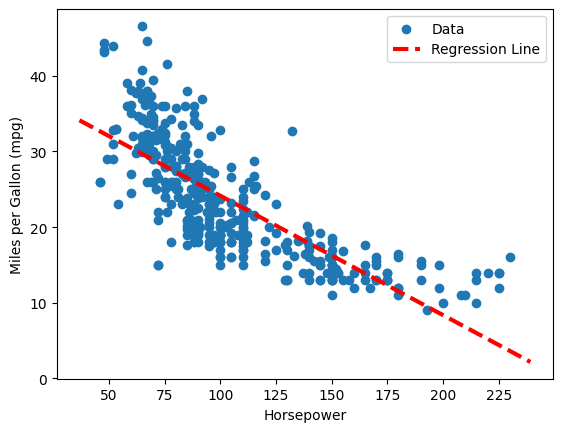

In [33]:
# plot mpg vs horsepower and plot the regression line
fig, ax = subplots()
ax.scatter(Auto["horsepower"], Auto["mpg"], label="Data")
xlim = ax.get_xlim ()
ylim = [results.params["horsepower"] * xlim [0] + results.params["const"], results.params["horsepower"] * xlim [1] + results.params["const"]]
ax.plot(xlim, ylim, "r--", linewidth=3, label="Regression Line")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Miles per Gallon (mpg)")
ax.legend()

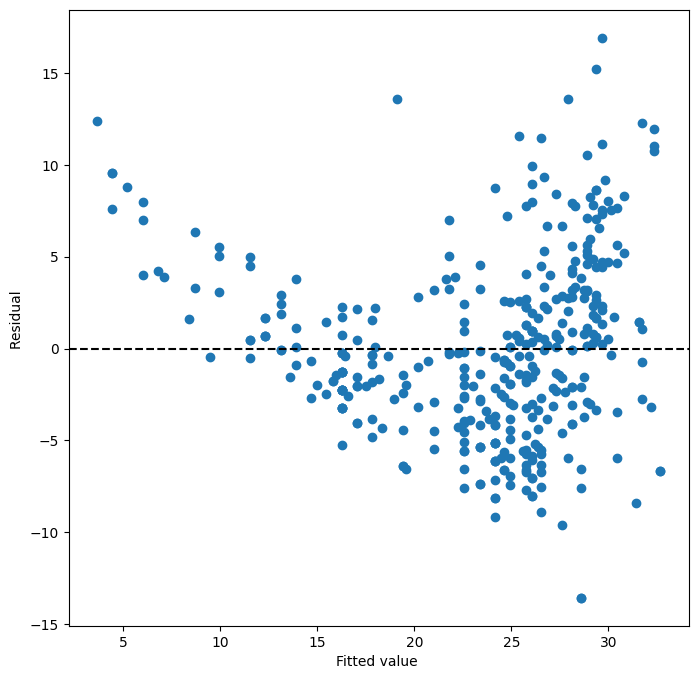

In [34]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value ")
ax.set_ylabel("Residual ")
ax.axhline(0, c="k", ls="--")

np.int64(115)

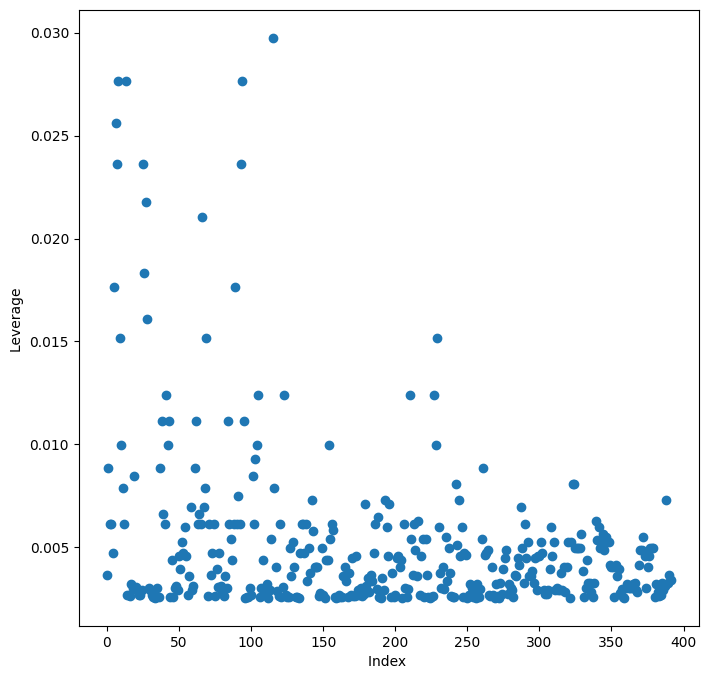

In [35]:
infl = results.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index ")
ax.set_ylabel("Leverage ")
np.argmax(infl.hat_matrix_diag)

#### 9

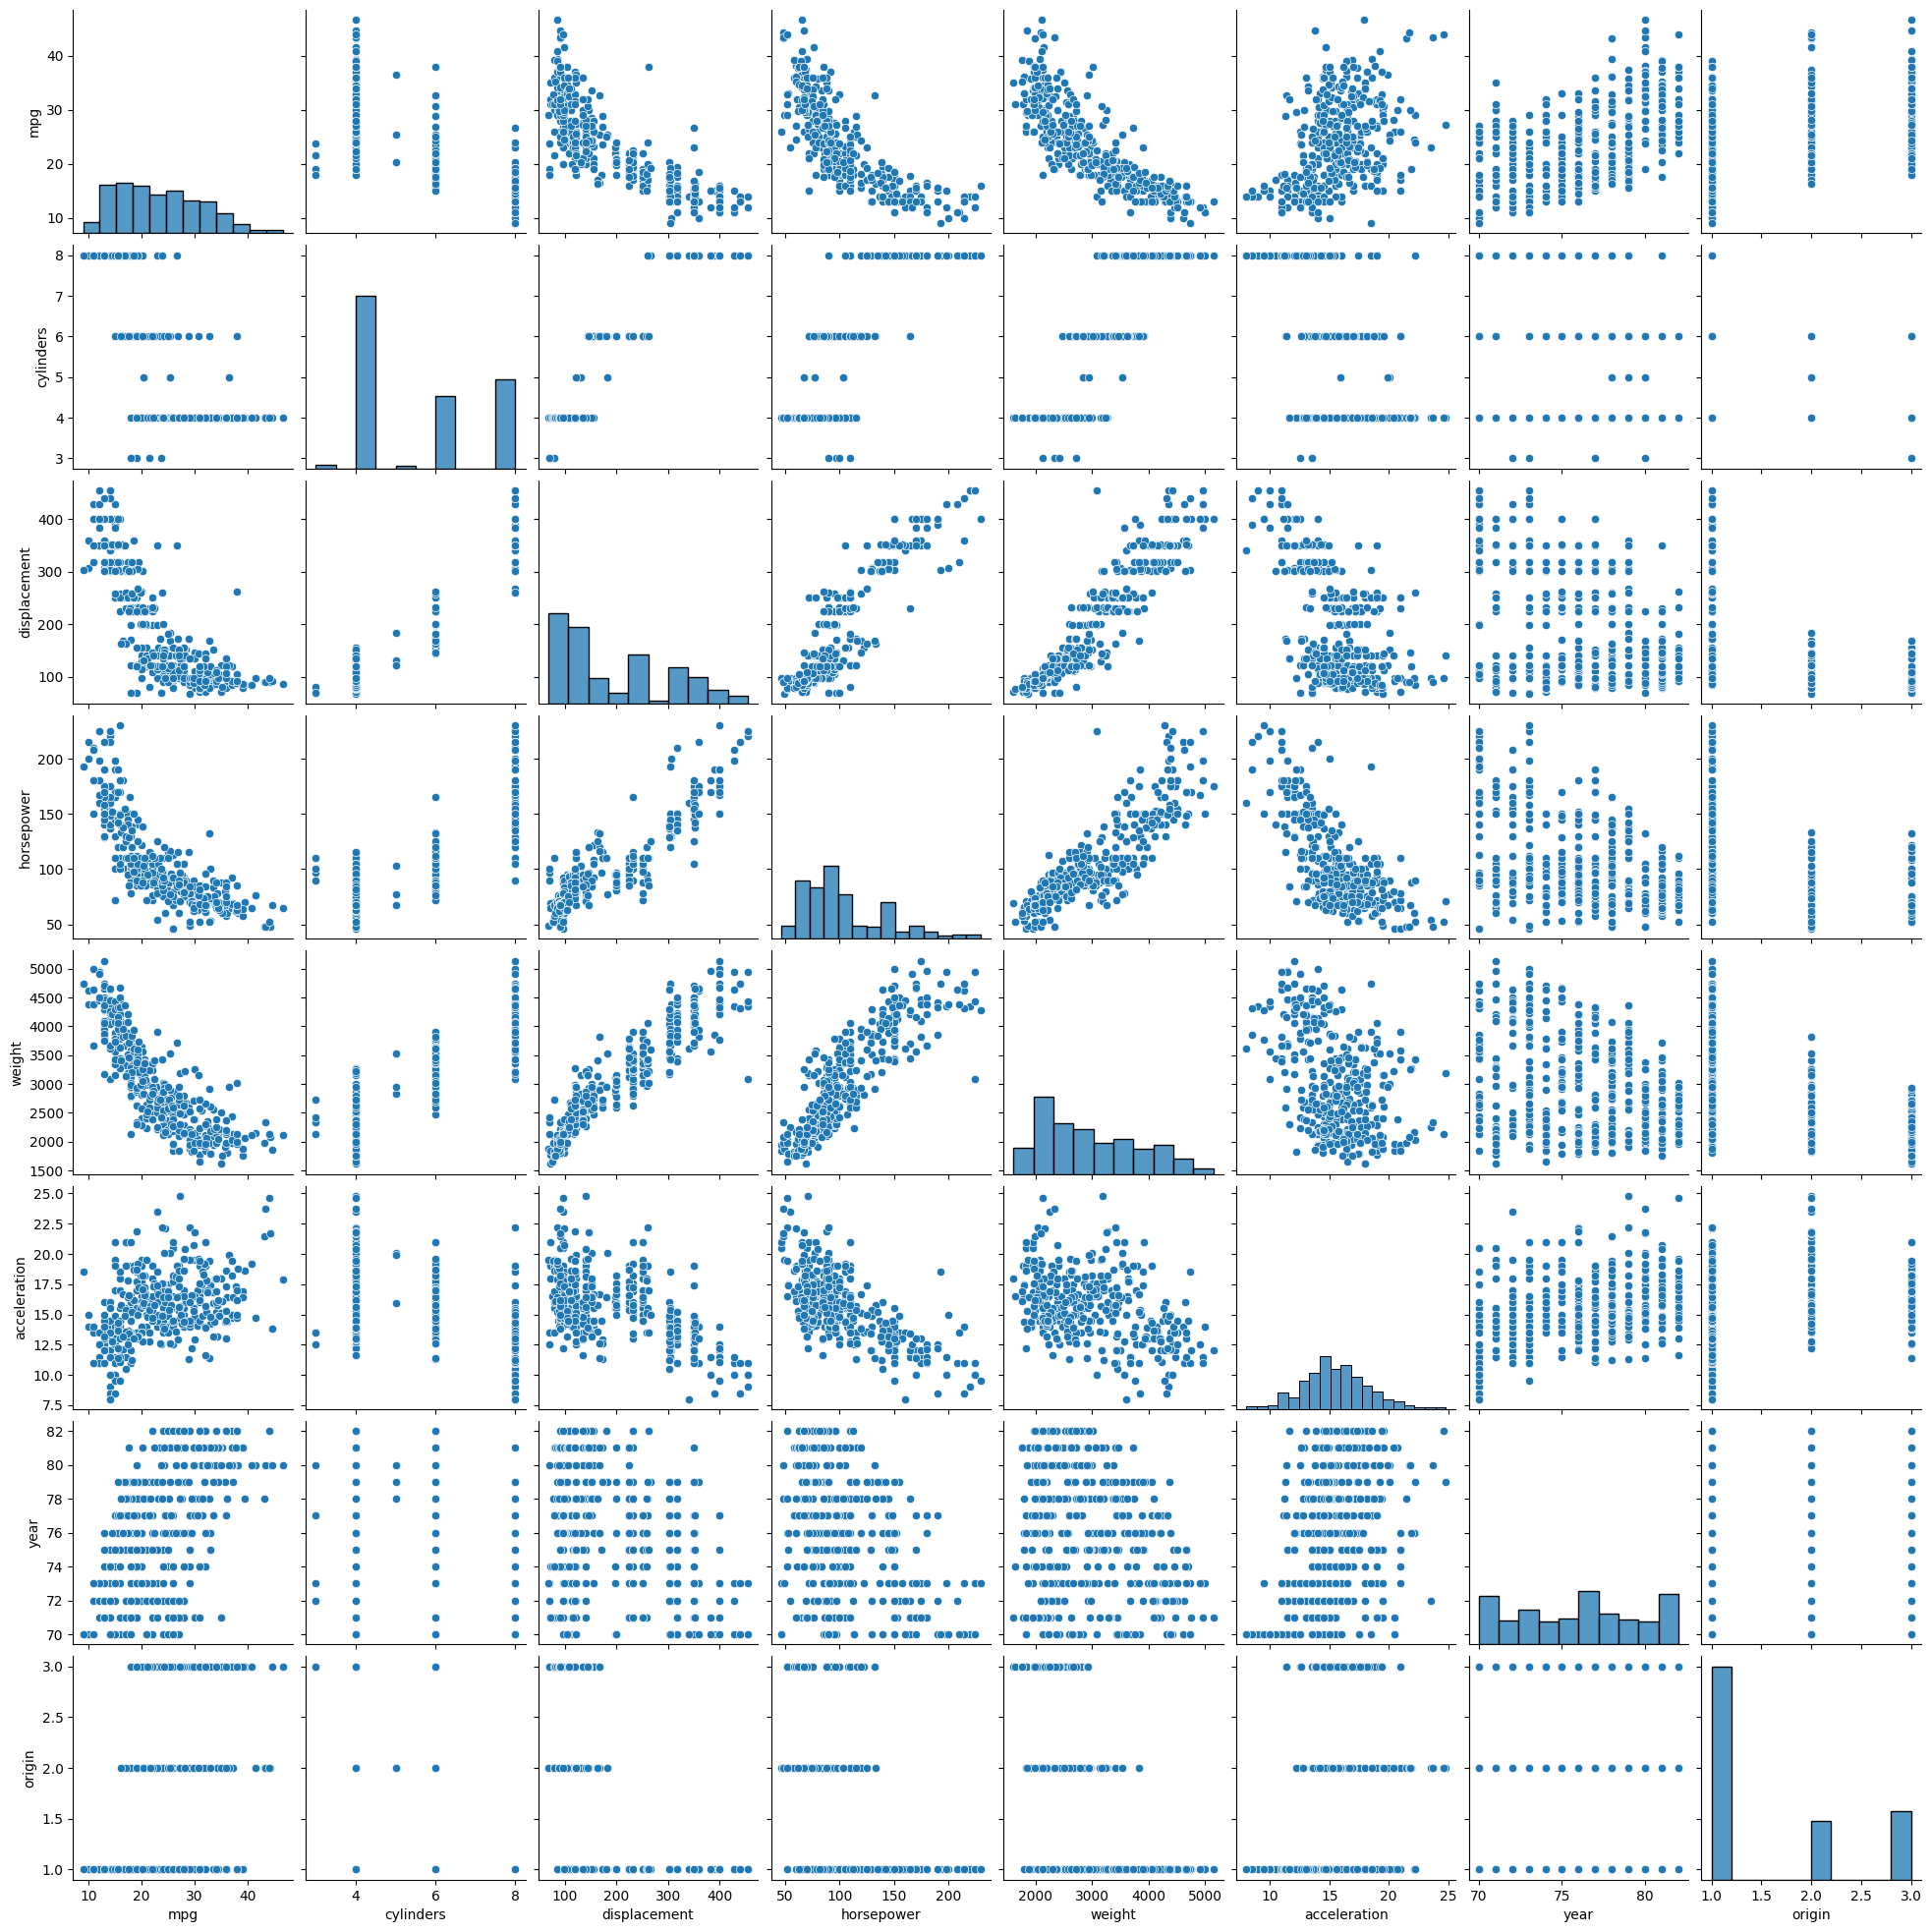

In [38]:
# scatterplot of all variables from auto dataset
sns.pairplot(Auto)

In [39]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


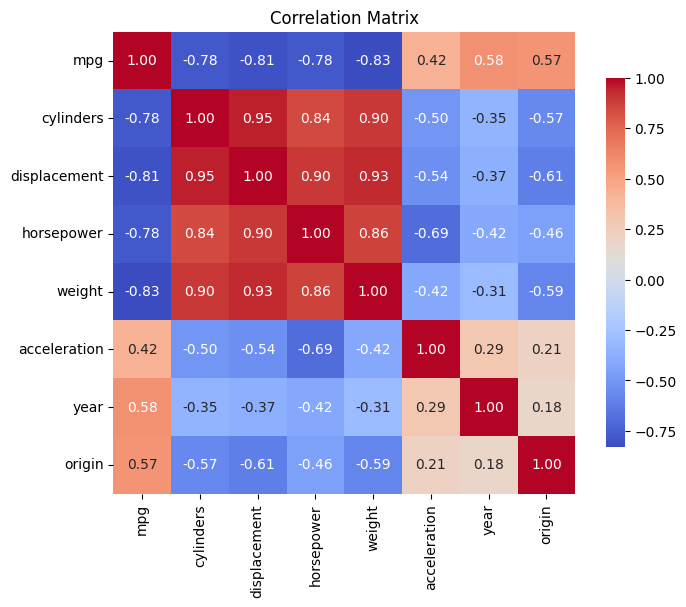

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    Auto.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix")
plt.show()

In [44]:
xcols = Auto.columns.drop("mpg")
X = sm.add_constant(Auto[xcols])
y = Auto["mpg"]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 31 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        10:44:03   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

formula = "mpg ~ " + " + ".join(xcols)
model_formula = smf.ols(formula=formula, data=Auto).fit()

# Run ANOVA
anova_results = anova_lm(model_formula, typ=2)
print(anova_results)

                   sum_sq     df           F        PR(>F)
cylinders       25.791491    1.0    2.329125  1.277965e-01
displacement    77.612668    1.0    7.008884  8.444649e-03
horsepower      16.739754    1.0    1.511699  2.196328e-01
weight        1091.631693    1.0   98.580813  7.874953e-21
acceleration     7.358417    1.0    0.664509  4.154780e-01
year          2402.249906    1.0  216.937408  3.055983e-39
origin         291.134494    1.0   26.291171  4.665681e-07
Residual      4252.212530  384.0         NaN           NaN


The F-statistic of the regression is significant, and there is a relationship between the output and the predictors

weight, year, and origin are the most statistically significant predictors of mpg

year is a very strong predictor; newer cars tend to have higher mpg



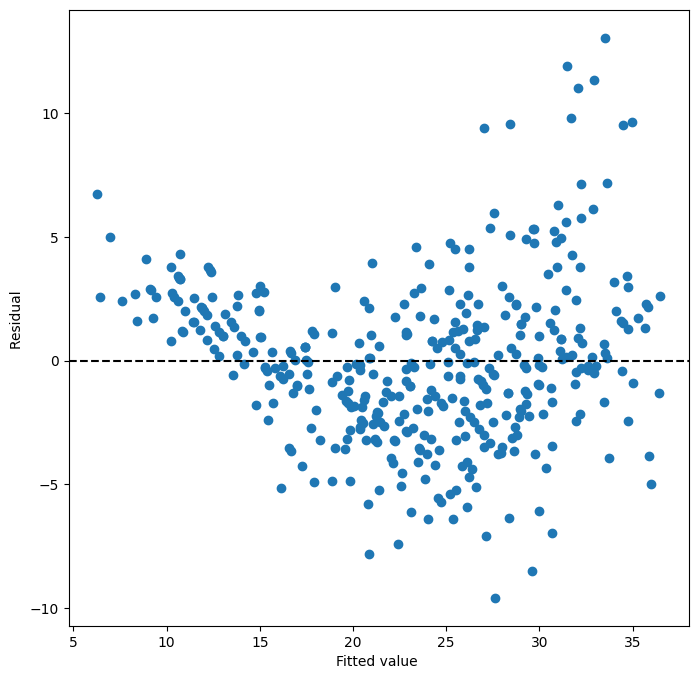

In [50]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value ")
ax.set_ylabel("Residual ")
ax.axhline(0, c="k", ls="--")

In [51]:
predictors = " + ".join(Auto.columns.difference(["name", "mpg"]))
result = smf.ols(
    "mpg ~ {} + horsepower*cylinders + np.power(horsepower,2)".format(predictors),
    data=Auto,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 31 Jul 2025   Prob (F-statistic):          6.47e-159
Time:                        10:57:31   Log-Likelihood:                -971.55
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### 10

In [72]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [73]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [74]:
display(Carseats['Urban'].value_counts())
display(Carseats["US"].value_counts())

Urban
Yes    282
No     118
Name: count, dtype: int64

US
Yes    258
No     142
Name: count, dtype: int64

In [75]:
Carseats["US"] = Carseats["US"].map({"Yes": 1, "No": 0})
Carseats["Urban"] = Carseats["Urban"].map({"Yes": 1, "No": 0})

In [76]:
Carseats[["Price", "US", "Urban"]].dtypes

Price       int64
US       category
Urban    category
dtype: object

In [77]:
predictors = " + ".join(["Price", "US", "Urban"])
result = smf.ols(
    "Sales ~ {}".format(predictors),
    data=Carseats,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.39e-23
Time:                        11:08:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

US and Price are significant predictors of Sales, whereas Urban is not

US="Yes" increases sales by 1.2006 whereas higher price has lower sales

Sales = 13.0435 - 0.545*Price - 0.0219*Urban + 1.2006*US

In [78]:
predictors = " + ".join(["Price", "US"])
result = smf.ols(
    "Sales ~ {}".format(predictors),
    data=Carseats,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.66e-24
Time:                        11:10:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [79]:
# get 95% confidence intervals for the coefficients
print(result.conf_int(0.05))

                  0          1
Intercept  11.79032  14.271265
US[T.1]     0.69152   1.707766
Price      -0.06476  -0.044195


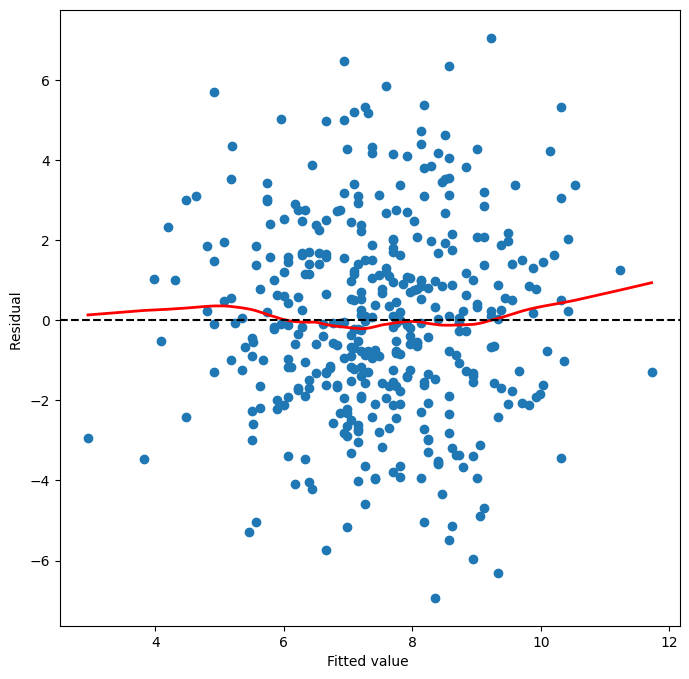

In [81]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(result.fittedvalues, result.resid)
lowess = sm.nonparametric.lowess(result.resid, result.fittedvalues, frac=0.5)
plt.plot(lowess[:, 0], lowess[:, 1], color="red", linewidth=2, label="Smooth Line")
ax.set_xlabel("Fitted value ")
ax.set_ylabel("Residual ")
ax.axhline(0, c="k", ls="--")

no evidence of outliers or high leverage points from the residual plot

#### 11

In [82]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [83]:
# y vs x regression without intercept
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 31 Jul 2025   Prob (F-statistic):                    6.23e-31
Time:                        11:56:03   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

$Y = \beta X$

$\hat{\beta}$ = 1.9762 and p-value is significant and the null hypothesis $H_0: \beta = 0$ can be rejected

In [84]:
# x vs y regression without intercept
model = sm.OLS(x, y)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 31 Jul 2025   Prob (F-statistic):                    6.23e-31
Time:                        12:00:53   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Although the betas in both cases are not related, the t-stats are the same.

![title](img/3.11_1.jpeg)

![title](img/3.11_2.jpeg)

In [94]:
t_stat = np.sqrt(x.shape[0] - 1) * x.dot(y) / (np.sqrt(np.sum(x**2) * np.sum(y**2) - np.sum(x.dot(y)**2)))
t_stat

np.float64(16.898417063035094)

In [95]:
# y vs x regression with intercept
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.74e-30
Time:                        13:05:01   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.4

In [96]:
# x vs y regression with intercept
model = sm.OLS(x, sm.add_constant(y))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.74e-30
Time:                        13:05:16   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.8

#### 12

a. var(X) = var(Y)

b. diff betas example above

In [97]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = np.random.permutation(x)

In [98]:
# y vs x regression without intercept
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.2505
Date:                Thu, 31 Jul 2025   Prob (F-statistic):                       0.618
Time:                        13:40:49   Log-Likelihood:                         -126.07
No. Observations:                 100   AIC:                                      254.1
Df Residuals:                      99   BIC:                                      256.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [99]:
# x vs y regression without intercept
model = sm.OLS(x, y)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.2505
Date:                Thu, 31 Jul 2025   Prob (F-statistic):                       0.618
Time:                        13:40:59   Log-Likelihood:                         -126.07
No. Observations:                 100   AIC:                                      254.1
Df Residuals:                      99   BIC:                                      256.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 13

In [125]:
def q13(snr):
    rng = np.random.default_rng(1)
    x = rng.normal(size=100)
    eps = rng.normal(size=100) / snr
    y = -1 + 0.5 * x + eps
    data = pd.DataFrame({"x": x, "y": y})

    # ols y vs x
    result = smf.ols(
        "y ~ x",
        data=data,
    ).fit()
    print(result.summary())

    # confidence intervals for the coefficients
    print("Confidence intervals for coefficients:")
    print(result.conf_int(0.05))

    # draw regression line with data
    plt.scatter(x, y, label="Data")
    plt.xlabel("x")
    plt.ylabel("y")
    xlim = plt.xlim()
    ylim = [
        result.params["x"] * xlim[0] + result.params["Intercept"],
        result.params["x"] * xlim[1] + result.params["Intercept"],
    ]
    ax.plot(xlim, ylim, "r--", linewidth=3, label="Regression Line")
    plt.plot(xlim, ylim, "r--", linewidth=3, label="Regression Line")
    plt.legend()
    plt.show()

    # use x and x^2 as predictors
    result = smf.ols(
        "y ~ x + np.power(x,2)",
        data=data,
    ).fit()
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.74e-30
Time:                        13:58:58   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0190      0.025    -40.537      0.0

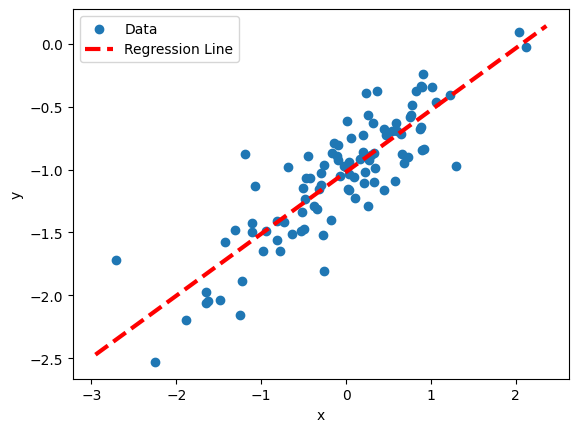

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.66e-29
Time:                        13:58:58   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0182      0.030    -34.

In [126]:
q13(4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           8.04e-13
Time:                        13:59:26   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0380      0.050    -20.647      0.0

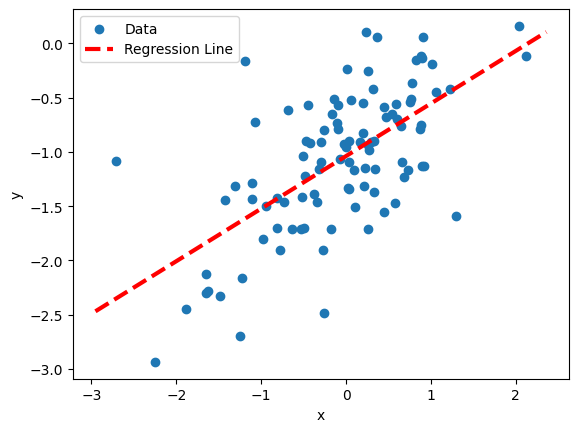

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.55
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           8.42e-12
Time:                        13:59:26   Log-Likelihood:                -71.744
No. Observations:                 100   AIC:                             149.5
Df Residuals:                      97   BIC:                             157.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0364      0.060    -17.

In [128]:
# increase the noise
q13(2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.08e-64
Time:                        13:59:41   Log-Likelihood:                 89.198
No. Observations:                 100   AIC:                            -174.4
Df Residuals:                      98   BIC:                            -169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0076      0.010   -100.209      0.0

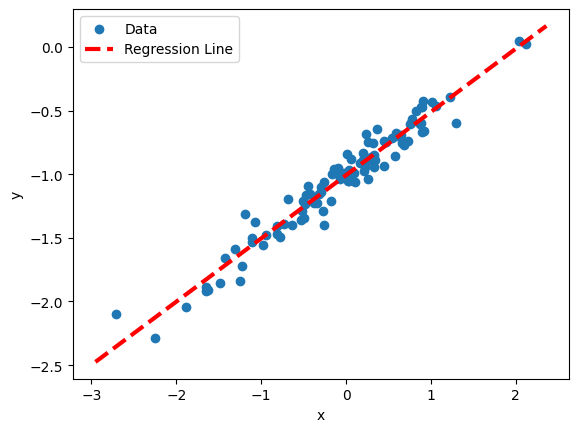

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     882.9
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.71e-63
Time:                        13:59:42   Log-Likelihood:                 89.200
No. Observations:                 100   AIC:                            -172.4
Df Residuals:                      97   BIC:                            -164.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0073      0.012    -84.

In [129]:
# decrease the noise
q13(10)

#### 14

In [130]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

,x1,x2,y
x1,1.000000,0.772324,0.530531
x2,0.772324,1.000000,0.471356
y,0.530531,0.471356,1.000000


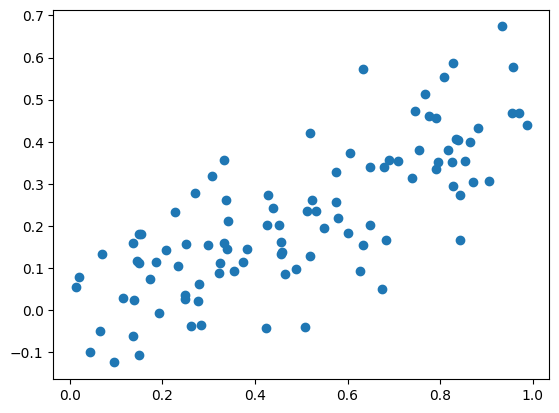

In [134]:
data = pd.DataFrame({"x1": x1, "x2": x2, "y": y})
display(data.corr())
plt.scatter(data['x1'], data['x2'])

In [136]:
result = smf.ols(
        "y ~ x1 + x2",
        data=data,
    ).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.76e-08
Time:                        14:08:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

the null hypothesis $H_0: \beta_2 = 0$ cannot be rejected

In [137]:
result = smf.ols(
    "y ~ x1",
    data=data,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.37e-08
Time:                        14:09:32   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.0

In [138]:
result = smf.ols(
    "y ~ x2",
    data=data,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           7.43e-07
Time:                        14:09:50   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.0

Individually x1 and x2 are predictive of y, but in the multiple linear regression with x1 and x2, $H_0: \beta_2 = 0$ cannot be rejected due to the high correlation between x1 and x2

,x1,x2,y
x1,1.000000,0.678915,0.465694
x2,0.678915,1.000000,0.516915
y,0.465694,0.516915,1.000000


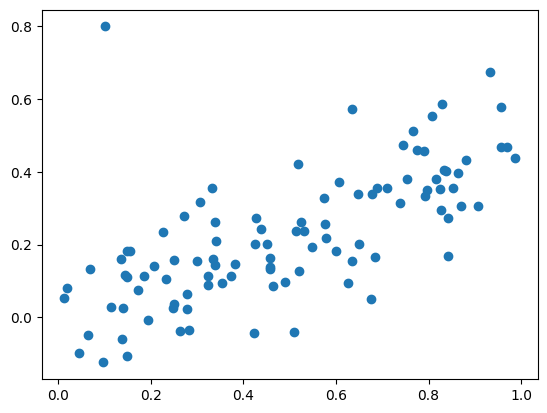

In [139]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
data = pd.DataFrame({"x1": x1, "x2": x2, "y": y})
display(data.corr())
plt.scatter(data["x1"], data["x2"])

In [140]:
result = smf.ols(
    "y ~ x1 + x2",
    data=data,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.60e-08
Time:                        14:12:06   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

In [141]:
result = smf.ols(
    "y ~ x1",
    data=data,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           9.23e-07
Time:                        14:12:19   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0739      0.201     10.310      0.0

In [142]:
result = smf.ols(
    "y ~ x2",
    data=data,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           3.13e-08
Time:                        14:12:23   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2840      0.151     15.088      0.0

In [143]:
data.corr()

,x1,x2,y
x1,1.000000,0.678915,0.465694
x2,0.678915,1.000000,0.516915
y,0.465694,0.516915,1.000000


The new point is an outlier


#### 15

In [145]:
Boston = load_data("Boston")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [147]:
predictors = Boston.columns[1:]
response = "crim"

In [157]:
s_params = {}
for p in predictors:
    # simple linear regression between p and response
    print(p)
    result = smf.ols(
        f"{response} ~ {p}",
        data=Boston,
    ).fit()
    print(result.summary())
    s_params[p] = result.params[p]

zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.51e-06
Time:                        14:25:38   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      

In [158]:
s_params

{'zn': np.float64(-0.07393497740412366),
 'indus': np.float64(0.5097763311042305),
 'chas': np.float64(-1.892776550803761),
 'nox': np.float64(31.248531201122894),
 'rm': np.float64(-2.684051224113949),
 'age': np.float64(0.10778622713953309),
 'dis': np.float64(-1.5509016824100996),
 'rad': np.float64(0.6179109273272014),
 'tax': np.float64(0.029742252822765367),
 'ptratio': np.float64(1.1519827870705865),
 'lstat': np.float64(0.5488047820623981),
 'medv': np.float64(-0.3631599222576032)}

every predictor except chas has a statistically significant association with the response

In [159]:
result = smf.ols(
    f"{response} ~ {'+'.join(predictors)}",
    data=Boston,
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.03e-56
Time:                        14:26:03   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.0

null hypothesis $H_0: \beta_j = 0$ can be rejected for dis, rad, medv

In [169]:
coeff_df = pd.DataFrame(pd.Series(s_params)).rename(columns={0: "simple"}).join(
    pd.DataFrame(result.params[predictors]).rename(columns={0: "multiple"})
)

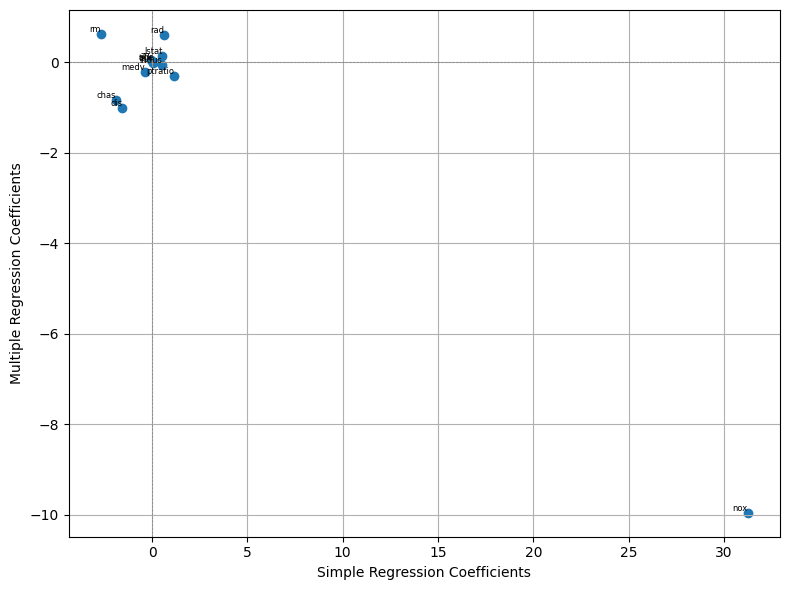

In [172]:
# plot scatter plot of coeff_df and name points from index

plt.figure(figsize=(8, 6))
plt.scatter(coeff_df["simple"], coeff_df["multiple"])

# Annotate each point with the variable name (from index)
for label, x, y in zip(coeff_df.index, coeff_df["simple"], coeff_df["multiple"]):
    plt.text(x, y, label, fontsize=6, ha="right", va="bottom")

# Add axis labels and title
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")

plt.grid(True)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [174]:
for p in predictors:
    # multiple linear regression between p, p^2, p^3 and response
    print(p)
    result = smf.ols(
        f"{response} ~ {p} + np.power({p}, 2) + np.power({p}, 3)",
        data=Boston,
    ).fit()
    print(result.summary())

zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.28e-06
Time:                        14:31:37   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433  